<a href="https://colab.research.google.com/github/ChangHuaHua/QM2-Group-12/blob/main/Chloropleth_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Install the geopandas module
!pip install geopandas

#Uninstall any existing version; forcing Yes
!pip uninstall --yes pysal

#Install newest branch
!pip install pysal==2.0.0

#install mapclassify
!pip install mapclassify


     |████████████████████████████████| 972kB 8.8MB/s 
     |████████████████████████████████| 14.8MB 241kB/s 
     |████████████████████████████████| 6.5MB 38.8MB/s 
     |████████████████████████████████| 25.0MB 1.8MB/s 
  Created wheel for pysal: filename=pysal-2.0.0-cp36-none-any.whl size=25231752 sha256=0b637095ac45e4dedabb90dd8dea64d01ab1cffdf2249af08762e040ea94ec84
  Stored in directory: /root/.cache/pip/wheels/ca/b9/69/49a64348ddb1feaf76b426c81c1db7275cfabacd8bf4ccd778
Successfully built pysal


In [3]:
#!pip install descartes



In [4]:
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import pylab
import descartes
import mapclassify 

%matplotlib inline

plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (20., 16.)

# Interactive Map 

In [5]:
# Import statements
import geopandas as gp
import json
import altair as alt
import pandas as pd

In [6]:
#Download World_shapefile https://hub.arcgis.com/datasets/252471276c9941729543be8789e06e12_0 
from google.colab import files
uploaded = files.upload()


Saving World_Countries__Generalized_.cpg to World_Countries__Generalized_.cpg
Saving World_Countries__Generalized_.dbf to World_Countries__Generalized_.dbf
Saving World_Countries__Generalized_.prj to World_Countries__Generalized_.prj
Saving World_Countries__Generalized_.shp to World_Countries__Generalized_.shp
Saving World_Countries__Generalized_.shx to World_Countries__Generalized_.shx


In [9]:
# Add all files to one folder
!mkdir data
!mkdir data/shp

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘data/shp’: File exists


In [10]:
datapath = '/content/data/shp/World_Countries__Generalized_.shp'
world= gp.read_file(datapath)
world['COUNTRY'].replace({"Congo DRC": "Democratic Republic of Congo","Côte d'Ivoire": "Cote d'Ivoire"}, inplace=True)

world.head()

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
1,2,United States Minor Outlying Islands,UM,United States,US,0.480216,0.003216,"MULTIPOLYGON (((-160.02114 -0.39805, -160.0281..."
2,3,Cook Islands,CK,New Zealand,NZ,0.980664,0.013073,"MULTIPOLYGON (((-159.74698 -21.25667, -159.793..."
3,4,French Polynesia,PF,France,FR,3.930211,0.175332,"MULTIPOLYGON (((-149.17920 -17.87084, -149.258..."
4,5,Niue,NU,New Zealand,NZ,0.541413,0.021414,"POLYGON ((-169.89389 -19.14556, -169.93088 -19..."


In [ ]:
#Isolate only for Africa data
#Merge geo data country  with africa data only

In [13]:
#Download Africa_Full_Merge data
from google.colab import files
uploaded = files.upload()

Saving 2a. Africa_FULL_MERGE.csv to 2a. Africa_FULL_MERGE.csv


In [15]:
datapath = '/content/2a. Africa_FULL_MERGE.csv'
df = pd.read_csv(datapath, encoding = 'latin1')
df.rename(columns={'Country':'COUNTRY'}, inplace=True)

df = df[['COUNTRY']]


In [ ]:
df

In [17]:
africa = world.merge(df, left_on = 'COUNTRY', right_on = 'COUNTRY')
africa

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,70,Burkina Faso,BF,Burkina Faso,BF,27.007423,22.634154,"POLYGON ((0.91797 10.99640, 0.81195 10.99694, ..."
1,70,Burkina Faso,BF,Burkina Faso,BF,27.007423,22.634154,"POLYGON ((0.91797 10.99640, 0.81195 10.99694, ..."
2,70,Burkina Faso,BF,Burkina Faso,BF,27.007423,22.634154,"POLYGON ((0.91797 10.99640, 0.81195 10.99694, ..."
3,70,Burkina Faso,BF,Burkina Faso,BF,27.007423,22.634154,"POLYGON ((0.91797 10.99640, 0.81195 10.99694, ..."
4,70,Burkina Faso,BF,Burkina Faso,BF,27.007423,22.634154,"POLYGON ((0.91797 10.99640, 0.81195 10.99694, ..."
...,...,...,...,...,...,...,...,...
3181,203,Somalia,SO,Somalia,SO,48.995362,52.070402,"POLYGON ((45.86945 10.84416, 45.89750 10.83027..."
3182,203,Somalia,SO,Somalia,SO,48.995362,52.070402,"POLYGON ((45.86945 10.84416, 45.89750 10.83027..."
3183,203,Somalia,SO,Somalia,SO,48.995362,52.070402,"POLYGON ((45.86945 10.84416, 45.89750 10.83027..."
3184,203,Somalia,SO,Somalia,SO,48.995362,52.070402,"POLYGON ((45.86945 10.84416, 45.89750 10.83027..."


In [18]:
africa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
africa['geometry'].head()

0    POLYGON ((0.91797 10.99640, 0.81195 10.99694, ...
1    POLYGON ((0.91797 10.99640, 0.81195 10.99694, ...
2    POLYGON ((0.91797 10.99640, 0.81195 10.99694, ...
3    POLYGON ((0.91797 10.99640, 0.81195 10.99694, ...
4    POLYGON ((0.91797 10.99640, 0.81195 10.99694, ...
Name: geometry, dtype: geometry

In [20]:
africa.crs = {'init': u'epsg:4326'}
target_crs = {'datum':'WGS84', 'no_defs':True, 'proj':'merc'}
projected_africa = africa.to_crs(crs=target_crs)

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [21]:
projected_africa['geometry'].head()

0    POLYGON ((102188.311 1223553.442, 90385.321 12...
1    POLYGON ((102188.311 1223553.442, 90385.321 12...
2    POLYGON ((102188.311 1223553.442, 90385.321 12...
3    POLYGON ((102188.311 1223553.442, 90385.321 12...
4    POLYGON ((102188.311 1223553.442, 90385.321 12...
Name: geometry, dtype: geometry

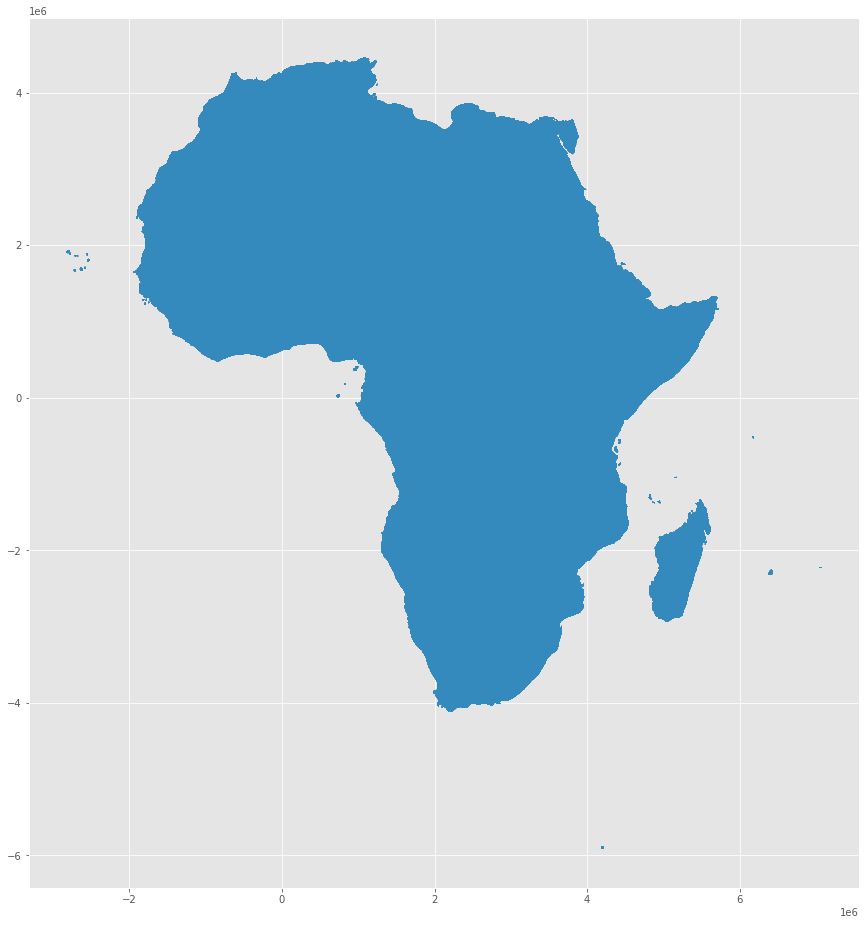

In [22]:
projected_africa.plot()

In [ ]:
#projected_africa.plot(column='FID', cmap='rainbow', scheme='quantiles')

In [25]:
# Merge geodata frame with full_merge dataframe 

In [26]:
#must merge ON persons, otherwise get pandas dataframe object, however we want geodataframe
geoafrica = africa.merge(df, left_on='COUNTRY', right_on = 'COUNTRY')
geoafrica.head()


,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,70,Burkina Faso,BF,Burkina Faso,BF,27.007423,22.634154,"POLYGON ((0.91797 10.99640, 0.81195 10.99694, ..."
1,70,Burkina Faso,BF,Burkina Faso,BF,27.007423,22.634154,"POLYGON ((0.91797 10.99640, 0.81195 10.99694, ..."
2,70,Burkina Faso,BF,Burkina Faso,BF,27.007423,22.634154,"POLYGON ((0.91797 10.99640, 0.81195 10.99694, ..."
3,70,Burkina Faso,BF,Burkina Faso,BF,27.007423,22.634154,"POLYGON ((0.91797 10.99640, 0.81195 10.99694, ..."
4,70,Burkina Faso,BF,Burkina Faso,BF,27.007423,22.634154,"POLYGON ((0.91797 10.99640, 0.81195 10.99694, ..."


In [29]:
type(geoafrica) #ensures type is geodataframe

geopandas.geodataframe.GeoDataFrame

In [28]:
geoafrica.to_csv('geodata_africa.csv')

Exception ignored in: <bound method WKTWriter.__del__ of <shapely.geos.WKTWriter object at 0x7f6907cbb400>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/shapely/geos.py", line 391, in __del__
    self._lgeos.GEOSWKTWriter_destroy(self._writer)
KeyboardInterrupt


# Plot TFR Chloropleth Map for 2018 

In [ ]:
# Create dataframe for 2018 
year_2018= geoafrica['Year']==2018

In [ ]:
geo18= geoafrica[year_2018]

In [ ]:
geo18.head()

In [ ]:
original_crs = geo18.crs
target_crs = {'datum':'WGS84', 'no_defs':True, 'proj':'merc'}
projected_geo18 = geo18.to_crs(crs=target_crs)

In [ ]:
projected_geo18.plot(column='TFR')
plt.title('2018 TFR by Country')
#plt.savefig('./data/wk9/Wards.png')

# Creating map with key 

In [ ]:
import numpy as np
import matplotlib



In [ ]:

# Convenience functions for working with colour ramps and bars
def colorbar_index(ncolors, cmap, labels=None, **kwargs):
    """
    This is a convenience function to stop you making off-by-one errors
    Takes a standard colour ramp, and discretizes it,
    then draws a colour bar with correctly aligned labels
    """
    cmap = cmap_discretize(cmap, ncolors)
    mappable = plt.cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = matplotlib.pyplot.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    if labels:
        colorbar.set_ticklabels(labels)
    return colorbar

def cmap_discretize(cmap, N):
    """
    Return a discrete colormap from the continuous colormap cmap.

        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.

    Example
        x = resize(arange(100), (5,100))
        djet = cmap_discretize(cm.jet, 5)
        imshow(x, cmap=djet)

    """
    if type(cmap) == str:
        cmap = get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0., 0., 0., 0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N + 1)
    cdict = {}
    for ki, key in enumerate(('red', 'green', 'blue')):
        cdict[key] = [(indices[i], colors_rgba[i - 1, ki], colors_rgba[i, ki]) for i in range(N+1)]
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d" % N, cdict, 1024)

In [ ]:
from pysal.viz.mapclassify import Quantiles

In [ ]:
breaks = Quantiles(
    geo18['TFR'].values,
    k=5)
print(breaks)

In [ ]:
print(breaks.bins)

In [ ]:
bar_labels = ['<=%i'% b for b in breaks.bins]
print(bar_labels)

In [ ]:
!pip install mapclassify


In [ ]:
import mapclassify 

In [ ]:
projected_geo18.plot(column='TFR', cmap='Greens', scheme='quantiles', k=5)
plt.title('2018 TFR by Country')

cmap = plt.get_cmap('Greens')
colorbar_index(ncolors=5, cmap=cmap, shrink=0.5, labels=bar_labels)

#Using plotly to create map with time sliders
https://support.sisense.com/hc/en-us/community/posts/360038301533-Plotly-Choropleth-With-Slider-Map-Charts-Over-Time-

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly as py

# min year in your dataset
year = 1960


In [ ]:
# your color-scale
scl = [[0.0, '#ffffff'],[0.2, '#b4a8ce'],[0.4, '#8573a9'],
       [0.6, '#7159a3'],[0.8, '#5732a1'],[1.0, '#2c0579']] # purples

data_slider = []
for year in geoafrica['Year'].unique():
    geoafrica_segmented =  geoafrica[(geoafrica['Year']== year)]

    for col in geoafrica_segmented.columns:
        geoafrica_segmented[col] = geoafrica_segmented[col].astype(str)

    data_each_yr = dict(
                        type='choropleth',
                        locations = geoafrica_segmented['state'], #need to fix this 
                        z=geoafrica_segmented['sightings'].astype(float),
                        locationmode='USA-states', #need to fix this 
                        colorscale = scl,
                        colorbar= {'title':'TFR'})

    data_slider.append(data_each_yr)

steps = []
for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(i + 1960))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title ='UFO Sightings by State Since 1998', geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=sliders)

fig = dict(data=data_slider, layout=layout)
periscope.plotly(fig)

# Interactive map with sliders diff source 
https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0

In [ ]:
import json
#Read data to json.
merged_json = json.loads(geo18.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

In [ ]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)
#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][6]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 8)
#Define custom tick labels for color bar.
    #tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
#Create figure object.
p = figure(title = 'TFR by Country, 2018') # plot_height = 40 , plot_width = 40, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'TFR', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify figure layout.
p.add_layout(color_bar, 'below')

#Display figure.
show(p)

Making map interactive now

In [ ]:
from bokeh.io import curdoc, output_notebook

from bokeh.models import Slider, HoverTool
from bokeh.layouts import widgetbox, row, column

#Define function that returns json_data for year selected by user.
def json_data(selectedYear):
    yr = selectedYear
    data_yr = data[data['Year'] == yr]
    merged = africa.merge(data_yr, left_on = 'COUNTRY', right_on = 'COUNTRY', how = 'left') #check the how
    merged.fillna('No data', inplace = True)
    merged_json = json.loads(merged.to_json())
    json_data = json.dumps(merged_json)
    return json_data

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data(2016))
#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 8, nan_color = '#d9d9d9')
#Define custom tick labels for color bar.
    #tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}
#Add hover tool
hover = HoverTool(tooltips = [ ('Country','@COUNTRY'),('TFR', '@TFR')])
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
#Create figure object.
p = figure(title = 'TFR by Country', toolbar_location = None, tools = [hover]) #, plot_height = 600 , plot_width = 950,
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'TFR', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify layout
p.add_layout(color_bar, 'below')
# Define the callback function: update_plot
def update_plot(attr, old, new):
    yr = slider.value
    new_data = json_data(yr)
    geosource.geojson = new_data
    p.title.text = 'TFR, %d' %yr
    
# Make a slider object: slider 
slider = Slider(title = 'Year',start = 1960, end = 2018, step = 1, value = 2018)
slider.on_change('value', update_plot)
# Make a column layout of widgetbox(slider) and plot, and add it to the current document
layout = column(p,widgetbox(slider))
curdoc().add_root(layout)
#Display plot inline in Jupyter notebook
output_notebook()
#Display plot
show(layout)



In [ ]:
bokeh json myapp.py 

"Note that the plot does not update when you change slider value in your Jupyter Notebook. To view this application in interactive mode you need to set up a local Bokeh server. Open a command line window in your current directory and executebokeh serve --show filename.ipynb command." - from source



In [ ]:
bokeh serve --show filename.ipynb

# Using folium to create interactive map 

https://towardsdatascience.com/a-step-by-step-guide-to-interactive-choropleth-map-in-python-681f6bd853ce

In [1]:
import folium
world = folium.Map(location=[0,0], zoom_start=2)
world

In [ ]:
wc = r'examples/data/world-countries.json'

In [ ]:
world.choropleth(geo_data=wc,
                data=geo18,
                columns=['COUNTRY', 'TFR'],
                key_on='feature.properties.name',
                fill_color='YlOrRd',
                fill_opacity=0.8,
                line_opacity=0.2,
                legend_name='TFR'
                )
world